In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from functools import reduce

In [29]:
fees_2016 = "baggage_csv_files/2016_baggage.csv"
fees_2017 = 'baggage_csv_files/2017_baggage.csv'
fees_2018 = 'baggage_csv_files/2018_baggage.csv'
fees_2019 = 'baggage_csv_files/2019_baggage.csv'


In [115]:
fees16_df = pd.read_csv(fees_2016)
fees17_df = pd.read_csv(fees_2017)
fees18_df = pd.read_csv(fees_2018)
fees19_df = pd.read_csv(fees_2019)
fees16_dfa = fees16_df.drop([13,1])
fees16_dfa

,Airline,1Q_16,2Q_16,3Q_16,4Q_16,Total_16
0,American,"262,464","288,836","288,124","278,048","1,117,473"
2,United,"158,949","175,460","185,609","170,386","690,404"
3,Spirit,"102,618","111,638","113,217","106,796","434,269"
4,Frontier,"70,755","71,578","84,962","79,497","306,792"
5,JetBlue,"57,853","57,625","59,548","56,578","231,604"
6,Allegiant,"43,759","45,934","45,168","42,468","177,329"
7,Alaska,"30,484","35,022","39,297","30,811","135,614"
8,Hawaiian,"19,804","20,994","22,332","19,270","82,400"
9,Virgin America,"14,334","16,415","17,651","15,889","64,289"
10,Southwest,"10,253","11,993","11,346","10,158","43,750"


In [ ]:
x_axis = ['Q1', 'Q2', 'Q3', 'Q4']


In [155]:
x_axis = ['Q1', 'Q2', 'Q3', 'Q4']

ax.set_prop_cycle(color=[
     '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b'])

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylim(0, 300000)
ax.set_yticks(range(0, 300000, 5000))

airlines = ['American', 'United', 'Spirit', 'Frontier', 'JetBlue', 'Allegiant',
           'Alaska', 'Hawaiian', 'Virgin American', 'Southwest', 'Sun Country', 'Island Air Hawaii']

for column in airlines:
    air_name = column.replace('\n', '_').replace(' ', '_')
    line = ax.plot(x_axis, air_name, data=fees16_dfa, lw=2.5)
    
    y_pos = fees16_dfa[air_name][-1]-0.5
    
    ax.text(x_axis, y_pos, column, fontsize=14, color=line.get_color())

plt.title('Baggage Fees 2016')
plt.xlabel("Airline")
plt.ylabel("Fees ($)")
plt.show()

ValueError: Unrecognized character A in format string

In [133]:
fees17_dfa = fees17_df.drop([13, 1])
fees17_dfa

,Airline,1Q_17,2Q_17,3Q_17,4Q_17,Total_17
0,American,"272,805","301,971","299,428","298,524","1,172,728"
2,United,"169,909","200,080","222,370","202,130","794,489"
3,Spirit,"110,908","125,844","125,457","130,436","492,645"
4,Frontier,"80,224","91,352","94,495","98,070","364,142"
5,JetBlue,"61,994","74,282","81,143","72,419","289,839"
6,Allegiant,"46,556","51,253","46,317","48,457","192,583"
7,Alaska,"30,602","38,232","42,114","36,295","147,243"
8,Hawaiian,"19,054","20,535","21,503","20,063","81,156"
9,Virgin America,"13,816","15,721","17,106","16,037","62,680"
10,Southwest,"10,419","12,298","11,934","11,460","46,111"


In [138]:
fees18_dfa = fees18_df.drop([11, 1])
fees18_dfa

,Airline,1Q_18,2Q_18,3Q_18,4Q_18,Total_18
0,American,"289,278","313,340","309,190","309,653","1,221,461"
2,Delta,"172,730","202,384","214,192","199,158","788,464"
3,Spirit,"144,345","161,656","166,505","165,736","638,242"
4,Frontier,"100,452","85,819","90,654","89,514","366,439"
5,JetBlue,"72,466","77,752","86,538","84,433","321,189"
6,Alaska,"48,800","77,881","83,804","69,182","279,667"
7,Allegiant,"56,568","59,751","52,919","50,322","219,560"
8,Hawaiian,"20,562","22,074","22,115","19,972","84,723"
9,Southwest,"11,436","13,418","12,873","12,222","49,949"
10,Sun Country,"8,739","8,798","9,300","9,323","36,160"


In [139]:
fees19_dfa = fees19_df.drop([11, 1])
fees19_dfa

,Airline,1Q_19,2Q_19,3Q_19,4Q_19,Total_19
0,Alaska,"69,691","85,531","94,289","78,140","327,651"
2,American,"317,297","350,554","342,127","329,146","1,339,124"
3,Delta,"201,412","288,351","293,618","251,677","1,035,058"
4,Frontier,"91,389","101,567","131,005","135,197","459,158"
5,Hawaiian,"20,185","22,515","22,588","20,468","85,756"
6,JetBlue,"84,591","89,860","95,810","91,153","361,414"
7,Southwest,"12,025","13,749","13,046","12,004","50,824"
8,Spirit,"176,063","194,915","191,072","196,721","758,771"
9,Sun Country,"16,687","17,741","18,793","17,346","70,567"
10,United,"238,470","274,949","258,986","233,928","1,006,333"


In [144]:
years = [fees16_df, fees17_df, fees18_df, fees19_df]
total_baggage_fees = reduce(lambda left, right: left.merge(right, how='outer', on="Airline"), years)
#total_baggage_fees = pd.concat(years)
total_baggage_fees

,Airline,1Q_16,2Q_16,3Q_16,4Q_16,Total_16,1Q_17,2Q_17,3Q_17,4Q_17,...,1Q_18,2Q_18,3Q_18,4Q_18,Total_18,1Q_19,2Q_19,3Q_19,4Q_19,Total_19
0,American,"262,464","288,836","288,124","278,048","1,117,473","272,805","301,971","299,428","298,524",...,"289,278","313,340","309,190","309,653","1,221,461","317,297","350,554","342,127","329,146","1,339,124"
1,Delta,"197,690","232,461","228,971","213,297","872,419","203,507","237,998","247,007","219,114",...,"172,730","202,384","214,192","199,158","788,464","201,412","288,351","293,618","251,677","1,035,058"
2,United,"158,949","175,460","185,609","170,386","690,404","169,909","200,080","222,370","202,130",...,"193,951","217,876","236,913","240,000","888,740","238,470","274,949","258,986","233,928","1,006,333"
3,Spirit,"102,618","111,638","113,217","106,796","434,269","110,908","125,844","125,457","130,436",...,"144,345","161,656","166,505","165,736","638,242","176,063","194,915","191,072","196,721","758,771"
4,Frontier,"70,755","71,578","84,962","79,497","306,792","80,224","91,352","94,495","98,070",...,"100,452","85,819","90,654","89,514","366,439","91,389","101,567","131,005","135,197","459,158"
5,JetBlue,"57,853","57,625","59,548","56,578","231,604","61,994","74,282","81,143","72,419",...,"72,466","77,752","86,538","84,433","321,189","84,591","89,860","95,810","91,153","361,414"
6,Allegiant,"43,759","45,934","45,168","42,468","177,329","46,556","51,253","46,317","48,457",...,"56,568","59,751","52,919","50,322","219,560","63,660","73,926","64,957","62,551","265,094"
7,Alaska,"30,484","35,022","39,297","30,811","135,614","30,602","38,232","42,114","36,295",...,"48,800","77,881","83,804","69,182","279,667","69,691","85,531","94,289","78,140","327,651"
8,Hawaiian,"19,804","20,994","22,332","19,270","82,400","19,054","20,535","21,503","20,063",...,"20,562","22,074","22,115","19,972","84,723","20,185","22,515","22,588","20,468","85,756"
9,Virgin America,"14,334","16,415","17,651","15,889","64,289","13,816","15,721","17,106","16,037",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
total_baggage_fees1 = total_baggage_fees.drop([total_baggage_fees.index[9], total_baggage_fees.index[12], 
                                               total_baggage_fees.index[13], total_baggage_fees.index[14]])
total_baggage_fees2 = total_baggage_fees1.set_index('Airline')
total_baggage_fees2

,1Q_16,2Q_16,3Q_16,4Q_16,Total_16,1Q_17,2Q_17,3Q_17,4Q_17,Total_17,1Q_18,2Q_18,3Q_18,4Q_18,Total_18,1Q_19,2Q_19,3Q_19,4Q_19,Total_19
Airline,,,,,,,,,,,,,,,,,,,,
American,"262,464","288,836","288,124","278,048","1,117,473","272,805","301,971","299,428","298,524","1,172,728","289,278","313,340","309,190","309,653","1,221,461","317,297","350,554","342,127","329,146","1,339,124"
Delta,"197,690","232,461","228,971","213,297","872,419","203,507","237,998","247,007","219,114","907,626","172,730","202,384","214,192","199,158","788,464","201,412","288,351","293,618","251,677","1,035,058"
United,"158,949","175,460","185,609","170,386","690,404","169,909","200,080","222,370","202,130","794,489","193,951","217,876","236,913","240,000","888,740","238,470","274,949","258,986","233,928","1,006,333"
Spirit,"102,618","111,638","113,217","106,796","434,269","110,908","125,844","125,457","130,436","492,645","144,345","161,656","166,505","165,736","638,242","176,063","194,915","191,072","196,721","758,771"
Frontier,"70,755","71,578","84,962","79,497","306,792","80,224","91,352","94,495","98,070","364,142","100,452","85,819","90,654","89,514","366,439","91,389","101,567","131,005","135,197","459,158"
JetBlue,"57,853","57,625","59,548","56,578","231,604","61,994","74,282","81,143","72,419","289,839","72,466","77,752","86,538","84,433","321,189","84,591","89,860","95,810","91,153","361,414"
Allegiant,"43,759","45,934","45,168","42,468","177,329","46,556","51,253","46,317","48,457","192,583","56,568","59,751","52,919","50,322","219,560","63,660","73,926","64,957","62,551","265,094"
Alaska,"30,484","35,022","39,297","30,811","135,614","30,602","38,232","42,114","36,295","147,243","48,800","77,881","83,804","69,182","279,667","69,691","85,531","94,289","78,140","327,651"
Hawaiian,"19,804","20,994","22,332","19,270","82,400","19,054","20,535","21,503","20,063","81,156","20,562","22,074","22,115","19,972","84,723","20,185","22,515","22,588","20,468","85,756"


In [152]:
x_axis = total_baggage_fees2.index.values
x_axis

array(['American', 'Delta ', 'United', 'Spirit', 'Frontier', 'JetBlue',
       'Allegiant', 'Alaska', 'Hawaiian', 'Southwest', 'Sun Country'],
      dtype=object)

In [153]:
money = [total_baggage_fees2["Total_16"].values, total_baggage_fees2["Total_17"].values, total_baggage_fees2['Total_18'].values, total_baggage_fees2["Total_19"].values]
y_axis = money
y_axis
#money

[array(['1,117,473', '872,419', '690,404', '434,269', '306,792', '231,604',
        '177,329', '135,614', '82,400', '43,750', '17,148'], dtype=object),
 array(['1,172,728', '907,626', '794,489', '492,645', '364,142', '289,839',
        '192,583', '147,243', '81,156', '46,111', '20,056'], dtype=object),
 array(['1,221,461', '788,464', '888,740', '638,242', '366,439', '321,189',
        '219,560', '279,667', '84,723', '49,949', '36,160'], dtype=object),
 array(['1,339,124', '1,035,058', '1,006,333', '758,771', '459,158',
        '361,414', '265,094', '327,651', '85,756', '50,824', '70,567'],
       dtype=object)]

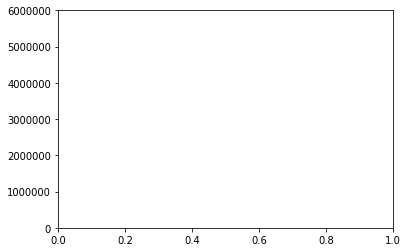

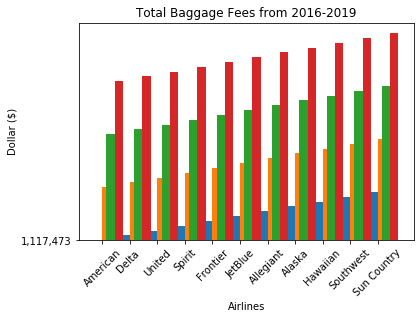

In [154]:
labels = x_axis
x = np.arange(len(labels))
width = 0.3
y = plt.ylim([0, 6000000])

total_2016 = total_baggage_fees2["Total_16"].values
total_2017 = total_baggage_fees2["Total_17"].values
total_2018 = total_baggage_fees2["Total_18"].values
total_2019 = total_baggage_fees2["Total_19"].values

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_2016, width, label = "2016")
rects2 = ax.bar(x + width/2, total_2017, width, label = "2017")
rects3 = ax.bar(x + width, total_2018, width, label = "2018")
rects4 = ax.bar(x + 2*width, total_2019, width, label = "2019")

ax.set_ylabel("Dollar ($)")
ax.set_xlabel("Airlines")
ax.set_title("Total Baggage Fees from 2016-2019")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.legend
plt.xticks(rotation = 45)

plt.autoscale(enable=True, axis='y', tight=False)
fig
plt.show()

In [103]:
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b'])

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(2015.5, 2019.5)
ax.set_xticks(range(2016, 2019, 1))
ax.set_ylim(0, 6000000)
ax.set_yticks(range(0, 6000000, 50000))

airlines = ['American', 'Delta', 'United', 'Spirit', 'Frontier', 'JetBlue',
           'Allegiant', 'Alaska', 'Hawaiian', 'Southwest', 'Sun Country']

for column in airlines:
    column_rec_name = column.replace('\n', '_').replace(' ', '_')
    
    line = ax.plot('Year', column_rec_name, data=total_baggage_fees2, lw=2.5)
    
plt.title("Total Baggage Fees 2016-2019")

plt.show()


ValueError: Unrecognized character A in format string